In [21]:
import os

from rdkit import Chem
from rdkit.Chem import rdDepictor
from rdkit.Chem import Draw

from scaffound import MolecularAnatomy

In [22]:
outfolder = '../graphics/hierarchy'
if not os.path.exists(outfolder):
    os.makedirs(outfolder)

In [23]:
camibirstat = 'C[C@@H]1CN(C[C@@H](O1)C)C2=CC=CC(=N2)C3=CSC(=N3)NC(=O)[C@H](COC)NC(=O)C4=CN(C=C4)S(=O)(=O)C'

In [24]:
mol = Chem.MolFromSmiles(camibirstat)

In [25]:
anatomy = MolecularAnatomy(mol)

In [26]:
core = Chem.MolFromSmarts('*~1~*~*~*~*~1~*~*~*~*~*~*~2~*~*~*(~*~2)~*~3~*~*(~*~*~*~3)~*~4~*~*~*~*~*~4')
rdDepictor.SetPreferCoordGen(True)
_ = rdDepictor.Compute2DCoords(core)
ps = Chem.AdjustQueryParameters.NoAdjustments()
ps.makeDummiesQueries=True
dcore = Chem.AdjustQueryProperties(core, ps)

In [27]:
mols = [mol,
        anatomy.basic_scaffold, anatomy.decorated_scaffold, anatomy.augmented_scaffold,
        anatomy.basic_framework, anatomy.decorated_framework, anatomy.augmented_framework,
        anatomy.basic_wireframe, anatomy.decorated_wireframe, anatomy.augmented_wireframe]
for mol_ in mols:
    rdDepictor.GenerateDepictionMatching2DStructure(mol_, core)

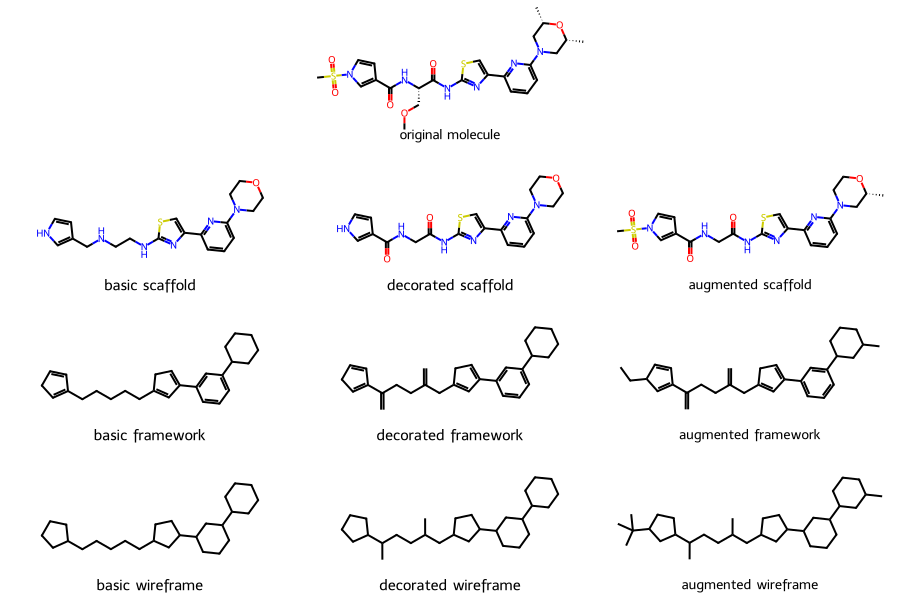

In [35]:
lbls = ['', 'original molecule', '',
        'basic scaffold', 'decorated scaffold', 'augmented scaffold',
        'basic framework', 'decorated framework', 'augmented framework',
        'basic wireframe', 'decorated wireframe', 'augmented wireframe'
        ]
mol_grid = [None, mols[0], None] + mols[1:]
Draw.MolsToGridImage(mol_grid, legends=lbls, subImgSize=(300, 150))

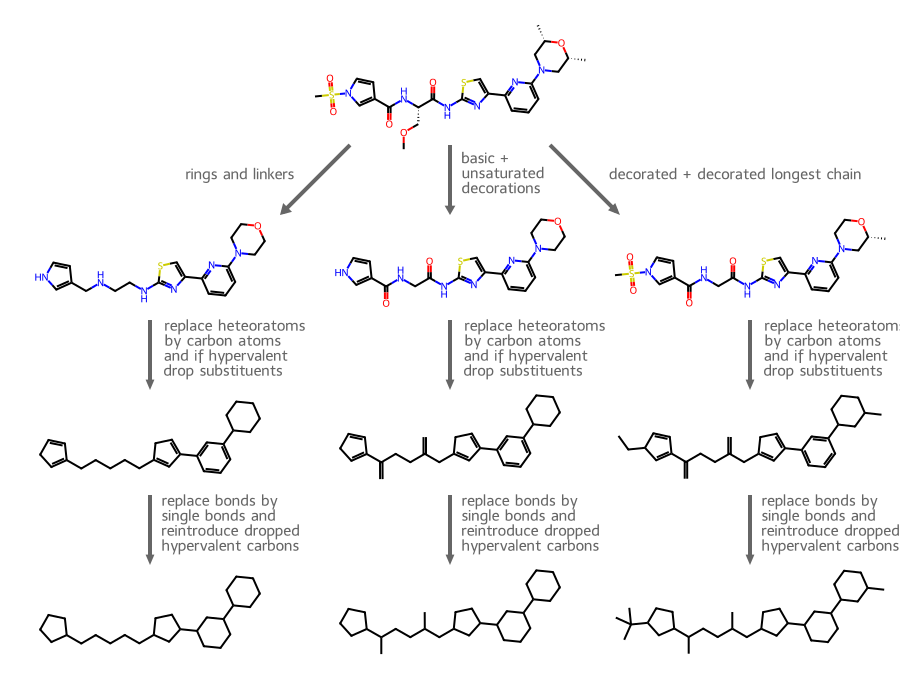

In [55]:
from IPython.display import SVG
from rdkit import Geometry


# set up the drawing object:
nRows = 4
nCols = 3
panelx = 300
panely = 175
d2d = Draw.MolDraw2DSVG(panelx * nCols, panely * nRows, panelx, panely)

# draw the sidechains
d2d.DrawMolecules(mol_grid)

# Now draw all the arrows and add the free-energy values
d2d.SetLineWidth(4)
d2d.SetFontSize(15)

# use gray arrows so that they don't stand out quite so much
#   (the original figure has solid black, but I find this nicer)
arrowColor = (.4,.4,.4)

p1 = Geometry.Point2D(panelx + 50, panely - 30)
p2 = Geometry.Point2D(panelx - 20, panely + 40)
d2d.DrawArrow(p1,p2,color=arrowColor,rawCoords=True, asPolygon=True)
midp = p2 + (p1-p2)/2
midp.x -= 75
midp.y -= 6.5
d2d.DrawString("rings and linkers", midp, rawCoords=True)

p1 = Geometry.Point2D(panelx * 1.5, panely - 30)
p2 = Geometry.Point2D(panelx * 1.5, panely + 40)
d2d.DrawArrow(p1,p2,color=arrowColor,rawCoords=True, asPolygon=True)
midp = p2 + (p1-p2)/2
midp.x += 35
midp.y -= 22.5
d2d.DrawString("basic +", midp, rawCoords=True)
midp.x += 18
midp.y += 15
d2d.DrawString("unsaturated", midp, rawCoords=True)
midp.x -= 2
midp.y += 15
d2d.DrawString("decorations", midp, rawCoords=True)

p1 = Geometry.Point2D(2 * panelx - 50, panely - 30)
p2 = Geometry.Point2D(2 * panelx + 20, panely + 40)
d2d.DrawArrow(p1,p2,color=arrowColor,rawCoords=True, asPolygon=True, angle=0.40)
midp = p2 + (p1-p2)/2
midp.x += 150
midp.y -= 6.5
d2d.DrawString("decorated + decorated longest chain", midp, rawCoords=True)

p1 = Geometry.Point2D(panelx / 2, 2 * panely - 30)
p2 = Geometry.Point2D(panelx / 2, 2 * panely + 40)
d2d.DrawArrow(p1,p2,color=arrowColor,rawCoords=True, asPolygon=True, angle=0.40)
midp = p2 + (p1-p2)/2
midp.x += 85
midp.y -= 30
d2d.DrawString("replace heteoratoms", midp, rawCoords=True)
midp.x -= 12
midp.y += 15
d2d.DrawString("by carbon atoms", midp, rawCoords=True)
midp.x += 3
midp.y += 15
d2d.DrawString("and if hypervalent", midp, rawCoords=True)
midp.x -= 3
midp.y += 15
d2d.DrawString("drop substituents", midp, rawCoords=True)


p1 = Geometry.Point2D(panelx / 2, 3 * panely - 30)
p2 = Geometry.Point2D(panelx / 2, 3 * panely + 40)
d2d.DrawArrow(p1,p2,color=arrowColor,rawCoords=True, asPolygon=True, angle=0.40)
midp = p2 + (p1-p2)/2
midp.x += 70
midp.y -= 30
d2d.DrawString("replace bonds by", midp, rawCoords=True)
midp.x -= 1.5
midp.y += 15
d2d.DrawString("single bonds and", midp, rawCoords=True)
midp.x += 12
midp.y += 15
d2d.DrawString("reintroduce dropped", midp, rawCoords=True)
midp.x -= 0
midp.y += 15
d2d.DrawString("hypervalent carbons", midp, rawCoords=True)

p1 = Geometry.Point2D(panelx * 1.5, 2 * panely - 30)
p2 = Geometry.Point2D(panelx * 1.5, 2 * panely + 40)
d2d.DrawArrow(p1,p2,color=arrowColor,rawCoords=True, asPolygon=True, angle=0.40)
midp = p2 + (p1-p2)/2
midp.x += 85
midp.y -= 30
d2d.DrawString("replace heteoratoms", midp, rawCoords=True)
midp.x -= 12
midp.y += 15
d2d.DrawString("by carbon atoms", midp, rawCoords=True)
midp.x += 3
midp.y += 15
d2d.DrawString("and if hypervalent", midp, rawCoords=True)
midp.x -= 3
midp.y += 15
d2d.DrawString("drop substituents", midp, rawCoords=True)

p1 = Geometry.Point2D(panelx * 1.5, 3 * panely - 30)
p2 = Geometry.Point2D(panelx * 1.5, 3 * panely + 40)
d2d.DrawArrow(p1,p2,color=arrowColor,rawCoords=True, asPolygon=True, angle=0.40)
midp = p2 + (p1-p2)/2
midp.x += 70
midp.y -= 30
d2d.DrawString("replace bonds by", midp, rawCoords=True)
midp.x -= 1.5
midp.y += 15
d2d.DrawString("single bonds and", midp, rawCoords=True)
midp.x += 12
midp.y += 15
d2d.DrawString("reintroduce dropped", midp, rawCoords=True)
midp.x -= 0
midp.y += 15
d2d.DrawString("hypervalent carbons", midp, rawCoords=True)

p1 = Geometry.Point2D(panelx * 2.5, 2 * panely - 30)
p2 = Geometry.Point2D(panelx * 2.5, 2 * panely + 40)
d2d.DrawArrow(p1,p2,color=arrowColor,rawCoords=True, asPolygon=True, angle=0.40)
midp = p2 + (p1-p2)/2
midp.x += 85
midp.y -= 30
d2d.DrawString("replace heteoratoms", midp, rawCoords=True)
midp.x -= 12
midp.y += 15
d2d.DrawString("by carbon atoms", midp, rawCoords=True)
midp.x += 3
midp.y += 15
d2d.DrawString("and if hypervalent", midp, rawCoords=True)
midp.x -= 3
midp.y += 15
d2d.DrawString("drop substituents", midp, rawCoords=True)

p1 = Geometry.Point2D(panelx * 2.5, 3 * panely - 30)
p2 = Geometry.Point2D(panelx * 2.5, 3 * panely + 40)
d2d.DrawArrow(p1,p2,color=arrowColor,rawCoords=True, asPolygon=True, angle=0.40)
midp = p2 + (p1-p2)/2
midp.x += 70
midp.y -= 30
d2d.DrawString("replace bonds by", midp, rawCoords=True)
midp.x -= 1.5
midp.y += 15
d2d.DrawString("single bonds and", midp, rawCoords=True)
midp.x += 12
midp.y += 15
d2d.DrawString("reintroduce dropped", midp, rawCoords=True)
midp.x -= 0
midp.y += 15
d2d.DrawString("hypervalent carbons", midp, rawCoords=True)

d2d.FinishDrawing()
svg = d2d.GetDrawingText()

with open(f'{outfolder}/scaffolds.svg', 'w') as oh:
    oh.write(svg)

SVG(svg)

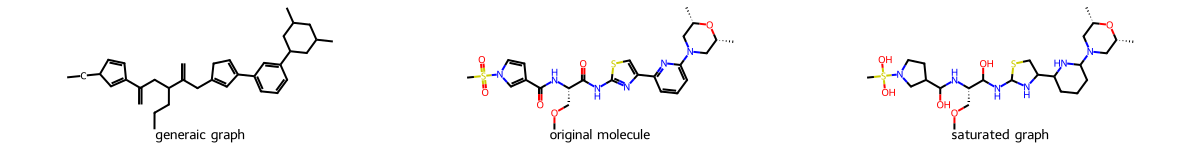

In [30]:
mols2 = [anatomy.generic_graph, mol, anatomy.saturated_graph]
lbls2 = ['generaic graph', 'original molecule', 'saturated graph']
Draw.MolsToGridImage(mols2, legends=lbls, subImgSize=(400, 150))

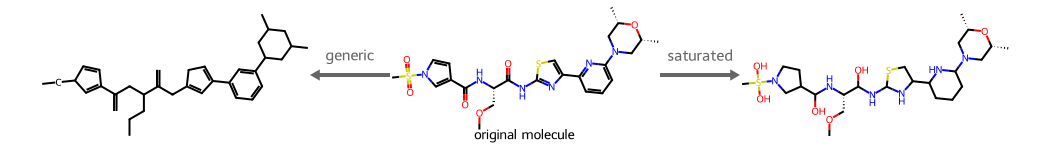

In [56]:
from IPython.display import SVG
from rdkit import Geometry


# set up the drawing object:
nRows = 1
nCols = 3
panelx = 350
panely = 150
d2d = Draw.MolDraw2DSVG(panelx * nCols, panely * nRows, panelx, panely)

# draw the sidechains
d2d.DrawMolecules(mols2, legends=['', 'original molecule', ''])

# Now draw all the arrows and add the free-energy values
d2d.SetLineWidth(4)
d2d.SetFontSize(15)

# use gray arrows so that they don't stand out quite so much
#   (the original figure has solid black, but I find this nicer)
arrowColor = (.4,.4,.4)

p1 = Geometry.Point2D(panelx - 40, panely / 2)
p2 = Geometry.Point2D(panelx + 40, panely / 2)
d2d.DrawArrow(p2, p1, color=arrowColor, rawCoords=True, asPolygon=True)
midp = p2 + (p1-p2)/2
midp.y -= 20
d2d.DrawString("generic", midp, rawCoords=True)

p1 = Geometry.Point2D(panelx * 2 - 40, panely / 2)
p2 = Geometry.Point2D(panelx * 2 + 40, panely / 2)
d2d.DrawArrow(p1, p2, color=arrowColor, rawCoords=True, asPolygon=True)
midp = p2 + (p1-p2)/2
midp.y -= 20
d2d.DrawString("saturated", midp, rawCoords=True)

d2d.FinishDrawing()
svg = d2d.GetDrawingText()

with open(f'{outfolder}/other_graphs.svg', 'w') as oh:
    oh.write(svg)

SVG(svg)